# Variables

In [1]:
SUBJ_ID="T02S01"
NAS="tupac"
protocole="healthy_volunteers"
DIR_PATH="/NAS/"+NAS+"/protocoles/"+protocole
FS_PATH=DIR_PATH+"/FS53/"
DTI_PATH=FS_PATH+SUBJ_ID+"/dti/"
TRACTO="whole_brain_6_1500000"#"LongueFibres_SIFT"
TRACTO_RES="FOS"
MESH="lh.white.ras"
ATLAS_FA = "/home/global/fsl509/data/atlases/JHU/JHU-ICBM-FA-2mm.nii.gz"
ATLAS_LABEL = "/home/global/fsl509/data/atlases/JHU/JHU-ICBM-labels-2mm.nii.gz"
SUBJ_FA = DTI_PATH+"dti_finalcor_FA.nii.gz"
FDWI = DTI_PATH+"dti.nii.gz"
FBVAL = DTI_PATH+"dti.bval"
FBVEC = DTI_PATH+"dti.bvec"
SEG = DTI_PATH+"raparc+aseg.nii"

## Imports

In [2]:
from dipy.io.image import load_nifti, save_nifti
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.reconst.dti import TensorModel
from dipy.reconst.csdeconv import (ConstrainedSphericalDeconvModel,auto_response)
from dipy.reconst.shm import CsaOdfModel
from dipy.direction import ProbabilisticDirectionGetter
from dipy.viz import fvtk
from dipy.viz.colormap import line_colors
from dipy.tracking.local import LocalTracking
from dipy.tracking.local import ThresholdTissueClassifier
from dipy.tracking import utils
from dipy.data import default_sphere
from dipy.direction import peaks_from_model

from skimage import segmentation
from skimage import morphology
from skimage import measure

import numpy as np
import nipype.interfaces.mrtrix as mrt
from nibabel import trackvis as tv
from matplotlib import pyplot as plt

## Ouverture des fichiers

In [4]:
data_dwi, affine = load_nifti(FDWI)
data_fa, affine = load_nifti(SUBJ_FA)
bvals, bvecs = read_bvals_bvecs(FBVAL,FBVEC)
gtab = gradient_table(bvals,bvecs)
data_seg, affine = load_nifti(SEG)

### Creation du DTI 

In [5]:
#tenmodel = TensorModel(gtab)
#tenfit = tenmodel.fit(data)
#save_nifti(DTI_PATH+"colorfa.nii.gz",tenfit.color_fa,affine)
data_colorfa, affine = load_nifti(DTI_PATH+"colorfa.nii.gz")

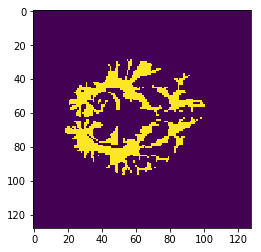

In [6]:
white_matter = ((data_seg == 41) | (data_seg == 2)) 
plt.imshow(white_matter[:,:,24])
plt.show()

# "CC" Corps Calleux

data_fa


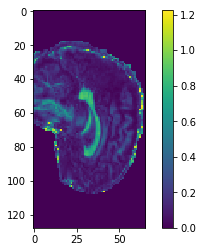

data_dwi


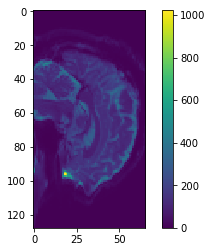

data_colorfa


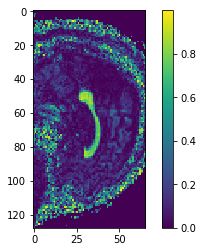

data_seg


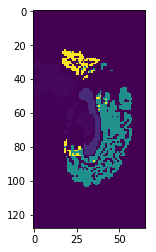

In [7]:
plt.imshow(data_fa[62,:,:])
plt.colorbar()
print("data_fa")
plt.show()
plt.imshow(data_dwi[62,:,:,0])
plt.colorbar()
print("data_dwi")
plt.show()
plt.imshow(data_colorfa[62,:,:,0])
plt.colorbar()
print("data_colorfa")
plt.show()
plt.imshow(data_seg[62,:,:])
print("data_seg")
plt.show()

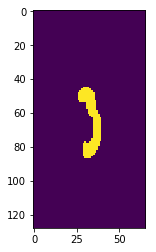

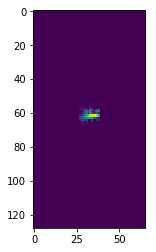

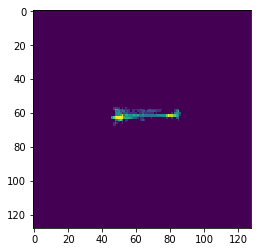

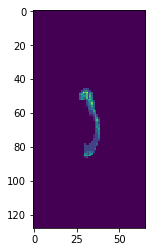

In [8]:
val=0.8
#mask = data_fa > val
mask_cc=((data_seg >= 251) & (data_seg <= 255) | (data_colorfa[:,:,:,0] > val))
filter_mask_cc = morphology.remove_small_objects(mask_cc)
#clear_image = segmentation.clear_border(filter_mask_cc)
#filter_mask_cc_f = morphology.binary_erosion(morphology.binary_dilation(filter_mask_cc))
filter_mask_cc_d = morphology.binary_dilation(filter_mask_cc);
plt.imshow(filter_mask_cc_d[62,:,:])
plt.show()

tmp=np.sum(filter_mask_cc,axis=1)
plt.imshow(tmp[:,:])
plt.show()

tmp=np.sum(filter_mask_cc,axis=2)
plt.imshow(tmp[:,:])
plt.show()

tmp=np.sum(filter_mask_cc,axis=0)
plt.imshow(tmp[:,:])
plt.show()

#plt.imshow(filter_mask_cc_f[62,:,:])
#plt.show()
#dilated2_a = morphology.binary_dilation(eroded_a)

In [9]:
labels_CC = morphology.label(filter_mask_cc_d,background=0)
props_CC = measure.regionprops(labels_CC)
for prop in props_CC:
    print prop.area
    print prop.bbox_area
    print prop.bbox
    print prop.centroid
    print prop.coords

1510
1081344
(56L, 45L, 26L, 69L, 88L, 40L)
(61.173509933774831, 63.143708609271521, 33.335099337748346)
[[56 47 30]
 [56 48 30]
 [56 48 33]
 ..., 
 [67 52 28]
 [68 47 29]
 [68 48 29]]


# "FOS" Faisceau Fronto Occiptal Superieur 

data_colorfa


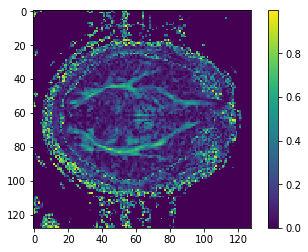

In [10]:
plt.imshow(data_colorfa[:,:,24,1])
plt.colorbar()
print("data_colorfa")
plt.show()

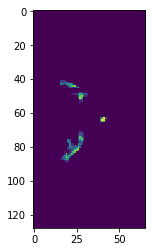

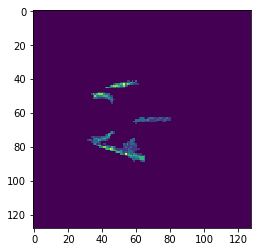

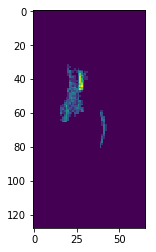

In [12]:
val=0.6
mask_cc=(((data_seg == 41) | (data_seg == 2)) & (data_colorfa[:,:,:,1] > val))
filter_mask_cc = morphology.remove_small_objects(mask_cc)
clear_image = segmentation.clear_border(filter_mask_cc)
#filter_mask_cc_e = morphology.binary_erosion(clear_image)
#filter_mask_cc_d = morphology.binary_dilation(filter_mask_cc_e);
tmp=np.sum(clear_image,axis=1)
plt.imshow(tmp[:,:])
plt.show()

tmp=np.sum(clear_image,axis=2)
plt.imshow(tmp[:,:])
plt.show()

tmp=np.sum(clear_image,axis=0)
plt.imshow(tmp[:,:])
plt.show()
#plt.imshow(filter_mask_cc_f[62,:,:])
#plt.show()
#dilated2_a = morphology.binary_dilation(eroded_a)

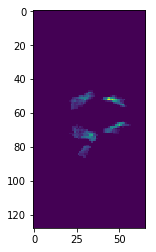

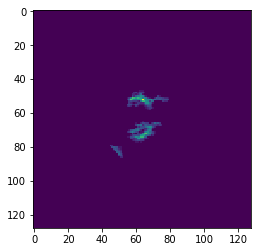

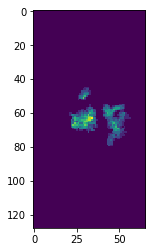

data_seg


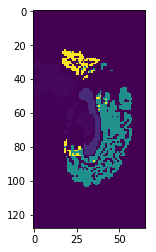

In [63]:
val=0.5
mask_cc=(((data_seg == 41) | (data_seg == 2)) & (data_colorfa[:,:,:,2] > val))
filter_mask_cc = morphology.remove_small_objects(mask_cc)
clear_image = segmentation.clear_border(filter_mask_cc)

tmp=np.sum(clear_image,axis=1)
plt.imshow(tmp[:,:])
plt.show()

tmp=np.sum(clear_image,axis=2)
plt.imshow(tmp[:,:])
plt.show()

tmp=np.sum(clear_image,axis=0)
plt.imshow(tmp[:,:])
plt.show()

plt.imshow(data_seg[62,:,:])
print("data_seg")
plt.show()

In [64]:
labels_fos = morphology.label(clear_image,background=0)
props_fos = measure.regionprops(labels_fos)
for prop in props_fos:
    print prop.area
    print prop.centroid

292
(51.955479452054796, 63.948630136986303, 28.065068493150687)
332
(52.412650602409641, 64.545180722891573, 46.701807228915662)
250
(68.284000000000006, 64.248000000000005, 47.436)
364
(72.799450549450555, 64.211538461538467, 30.667582417582416)
93
(82.096774193548384, 49.053763440860216, 29.56989247311828)


## Probabilistic Tracking

In [38]:
seeds_cc = utils.seeds_from_mask(filter_mask_cc_d, density=[2, 2, 2], affine=affine)
seed_mask1=(labels_fos==1)
seeds1 = utils.seeds_from_mask(seed_mask1, density=[2, 2, 2], affine=affine)
seed_mask2=(labels_fos==2)
seeds2 = utils.seeds_from_mask(seed_mask2, density=[2, 2, 2], affine=affine)
seed_mask3=(labels_fos==3)
seeds3 = utils.seeds_from_mask(seed_mask3, density=[2, 2, 2], affine=affine)
seed_mask4=(labels_fos==4)
seeds4 = utils.seeds_from_mask(seed_mask2, density=[2, 2, 2], affine=affine)

In [ ]:
seed_mask=(labels_fos==1)
seeds = utils.seeds_from_mask(seed_mask, density=[2, 2, 2], affine=affine)

In [65]:
response, ratio = auto_response(gtab, data_dwi, roi_radius=10, fa_thr=0.7)
csd_model = ConstrainedSphericalDeconvModel(gtab, response, sh_order=6)
csd_fit = csd_model.fit(data_dwi, mask=white_matter)
prob_dg = ProbabilisticDirectionGetter.from_shcoeff(csd_fit.shm_coeff,max_angle=30.,sphere=default_sphere)

csa_model = CsaOdfModel(gtab, sh_order=6)
csa_peaks = peaks_from_model(csa_model, data_dwi, default_sphere,relative_peak_threshold=.8,min_separation_angle=45,mask=white_matter)
classifier = ThresholdTissueClassifier(csa_peaks.gfa, .25)

In [40]:
streamlines_cc = LocalTracking(prob_dg, classifier, seeds_cc, affine,step_size=.5, max_cross=1)

streamlines1 = LocalTracking(prob_dg, classifier, seeds1, affine,step_size=.5, max_cross=1)
streamlines2 = LocalTracking(prob_dg, classifier, seeds2, affine,step_size=.5, max_cross=1)
streamlines3 = LocalTracking(prob_dg, classifier, seeds3, affine,step_size=.5, max_cross=1)
streamlines4 = LocalTracking(prob_dg, classifier, seeds4, affine,step_size=.5, max_cross=1)

# Compute streamlines and store as a list.
streamlines_cc = list(streamlines_cc)
streamlines1 = list(streamlines1)
streamlines2 = list(streamlines2)
streamlines3 = list(streamlines3)
streamlines4 = list(streamlines4)

In [41]:
print(len(streamlines_cc))
print(len(streamlines1))
print(len(streamlines2))
print(len(streamlines3))
print(len(streamlines4))

8248
7088
1096
576
1096


In [42]:
other_streamlines = utils.target(streamlines1, filter_mask_cc_d, affine=affine,include=False)
other_streamlines = list(other_streamlines)

Faisceaux associatif en vert |||| Commissures en rouge |||| Faisceaux de projection en bleu 

In [1]:
#color = line_colors(streamlines)

r = fvtk.ren()
    #streamlines_actor = fvtk.line(streamlines, line_colors(streamlines))
    #fvtk.add(r, streamlines_actor)
fvtk.add(r, fvtk.streamtube(streamlines_cc,fvtk.colors.white,linewidth=0.2,opacity=0.1));
fvtk.add(r, fvtk.streamtube(other_streamlines,fvtk.colors.pink,linewidth=0.2,opacity=0.1));
fvtk.add(r, fvtk.streamtube(streamlines2,fvtk.colors.green,linewidth=0.2,opacity=0.1));
fvtk.add(r, fvtk.streamtube(streamlines3,fvtk.colors.red,linewidth=0.2,opacity=0.1));
fvtk.add(r, fvtk.streamtube(streamlines4,fvtk.colors.blue,linewidth=0.2,opacity=0.1));
#fvtk.record(r, n_frames=1, out_path='probabilistic.png',size=(800, 800))
fvtk.show(r)

NameError: name 'fvtk' is not defined

# Sauvegarde ROI & Tracks

In [ ]:
save_nifti(DTI_PATH+"seed_mask1.nii",seed_mask1.astype(float),affine)
#mask_cc, affine = load_nifti(DTI_PATH+"filter_mask_cc_d.nii")
#!tckedit -force -minlength 30 -include $DTI_PATH"seed_mask1.nii" $DTI_PATH$TRACTO".tck" $DTI_PATH"seed_mask1.tck"
#!tckstats $DTI_PATH"seed_mask1.tck"
!mrview -load $SUBJ_FA -load $SUBJ_FA -tractography.load $DTI_PATH"seed_mask1.tck"

In [ ]:
csa_model = CsaOdfModel(gtab, sh_order=6)
csa_peaks = peaks_from_model(csa_model, data_dwi, default_sphere,relative_peak_threshold=.8,min_separation_angle=45,mask=white_matter)
seeds = utils.seeds_from_mask(filter_mask_cc_d, density=[2, 2, 2], affine=affine)
response, ratio = auto_response(gtab, data_dwi, roi_radius=10, fa_thr=0.7)
csd_model = ConstrainedSphericalDeconvModel(gtab, response, sh_order=6)
csd_fit = csd_model.fit(data_dwi, mask=white_matter)
prob_dg = ProbabilisticDirectionGetter.from_shcoeff(csd_fit.shm_coeff,max_angle=30.,sphere=default_sphere)
classifier = ThresholdTissueClassifier(csa_peaks.gfa, .25)

In [ ]:
streamlines = LocalTracking(prob_dg, classifier, seeds, affine,step_size=.5, max_cross=1)
streamlines = list(streamlines)

In [ ]:
# Prepare the display objects.
color = line_colors(streamlines)

if fvtk.have_vtk:
    r = fvtk.ren()
    #streamlines_actor = fvtk.line(streamlines, line_colors(streamlines))
    #fvtk.add(r, streamlines_actor)
    fvtk.add(r, fvtk.streamtube(streamlines,fvtk.colors.white,linewidth=0.2,opacity=0.1));
    #fvtk.record(r, n_frames=1, out_path='probabilistic.png',size=(800, 800))
    fvtk.show(r)

## Tracks Convert & loading  

In [ ]:
tck2trk = mrt.MRTrix2TrackVis()
tck2trk.inputs.in_file = DTI_PATH+TRACTO_RES+".tck"
tck2trk.inputs.image_file = DTI_PATH+"/b0.nii"
tck2trk.inputs.out_filename = DTI_PATH+TRACTO_RES+".trk"
tck2trk.run() 

In [ ]:
streams, hdr = tv.read(DTI_PATH+TRACTO+".trk")
streamlines = [i[0] for i in streams]

Avec trk et dipy

In [ ]:
cc_streamlines = utils.target(streamlines, filter_mask_cc_d,affine=affine)
cc_streamlines = list(cc_streamlines)

other_streamlines = utils.target(streamlines, filter_mask_cc_d, affine=affine,include=False)
other_streamlines = list(other_streamlines)
assert len(other_streamlines) + len(cc_streamlines) == len(streamlines)

Avec tck mrview etc...

In [4]:
!echo "mri_extract_label $SEG 253 $DTI_PATH"cc_mrtrix253.nii""
#!tckedit -force -minlength 50 -include $DTI_PATH"cc_mrtrix253.nii" $DTI_PATH$TRACTO".tck" $DTI_PATH"cc_mrtrix253.tck"
!tckstats $DTI_PATH"cc_mrtrix253.tck"
!mrview -load $SUBJ_FA -tractography.load $DTI_PATH"cc_mrtrix253.tck"

mri_extract_label /NAS/tupac/protocoles/healthy_volunteers/FS53/T02S01/dti/raparc+aseg.nii 253 /NAS/tupac/protocoles/healthy_volunteers/FS53/T02S01/dti/cc_mrtrix253.nii
tckstats: [100%] Reading track file
         mean       median    std. dev.          min          max       count
       118.93      115.849      32.6835      50.0209      200.333        27719


In [ ]:
#test= filter_mask_cc_d > 9999999
#test[62,:,:]=filter_mask_cc_d[62,:,:]
save_nifti(DTI_PATH+"filter_mask_cc_d.nii",filter_mask_cc_d.astype(float),affine)
!tckedit -force -minlength 50 -include $DTI_PATH"filter_mask_cc_d.nii" $DTI_PATH$TRACTO".tck" $DTI_PATH"CC.tck"
!tckstats $DTI_PATH"CC.tck"

#!mri_extract_label $DTI_PATH"raparc+aseg.nii" 46 47 7 8 15 16 $DTI_PATH"exclude_mask.nii"
!mri_extract_label $SEG 251 252 253 254 255 $DTI_PATH"cc_mrtrix.nii"
!tckedit -force -minlength 50 -include $DTI_PATH"cc_mrtrix.nii" $DTI_PATH$TRACTO".tck" $DTI_PATH"CC_mrtrix.tck"
!tckstats $DTI_PATH"CC_mrtrix.tck"

!mrview -load $SUBJ_FA -load $DTI_PATH"filter_mask_cc_d.nii" -tractography.load $DTI_PATH"CC_mrtrix.tck" -tractography.load $DTI_PATH"CC.tck"

In [ ]:
!tckedit -force -include 27,8,79,10 -minlength 100 -exclude $DTI_PATH"exclude_mask.nii" -include $DTI_PATH"occipital.nii" $DTI_PATH$TRACTO".tck" $DTI_PATH$TRACTO_RES".tck"
!mrview $SUBJ_FA -tractography.load $DTI_PATH$TRACTO_RES".tck"

## Génération de fibre par mrtrix

Creation du fichier r5tt.nii (pour le visualiser : r5ttvis.nii)...

In [ ]:
!5ttgen freesurfer -force $DTIraparc+aseg.nii $DTI"r5tt.nii"
#!5tt2vis -force $DTI"r5tt.nii" $DTI"r5ttvis.nii"

In [ ]:
!tckgen -force -algorithm iFOD2 -select 1000 -seed_image dti/cc_mrtrix.nii -act dti/r5tt.nii dti/CSD6.mif dti/CC_mrtrix_gen1000.tck 
!tckgen -force -algorithm iFOD2 -select 10000 -seed_image dti/cc_mrtrix.nii -act dti/r5tt.nii dti/CSD6.mif dti/CC_mrtrix_gen10000.tck 
!tckgen -force -algorithm iFOD2 -select 100000 -seed_image dti/cc_mrtrix.nii -act dti/r5tt.nii dti/CSD6.mif dti/CC_mrtrix_gen100000.tck 
!mrview $SUBJ_FA -tractography.load $DTI_PATH"CC_mrtrix_gen1000.tck" $DTI_PATH"CC_mrtrix_gen10000.tck" $DTI_PATH"CC_mrtrix_gen10000.tck"